In [1]:
import turicreate as tc

## Load House sales data

In [22]:
houses = tc.SFrame('datasets/home_data.sframe')

In [23]:
houses

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


## Exploring houses data

In [24]:
houses.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [25]:
tc.show(houses[1:5000]['sqft_living'],houses[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

## Create a simple regression model of sqft_living to price

### splitting the dataset

In [26]:
train_data, test_data = houses.random_split(.8, seed=0)

### create the model

In [29]:
sqft_living_model = tc.linear_regression.create(dataset=train_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.021293     | 4337536.800063     | 2265617.273574       | 262218.266346                   | 276395.907992                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

### Evaluate the simple model

In [30]:
test_data['price'].mean()

543054.042563254

In [31]:
print(sqft_living_model.evaluate(test_data))

# rmse != mse != rss

{'max_error': 4134105.8801244004, 'rmse': 255215.9475490249}


### Visualizing our prediction

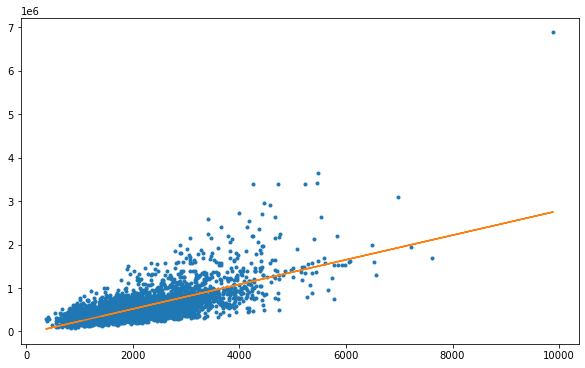

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(test_data['sqft_living'], test_data['price'], '.',
        test_data['sqft_living'], sqft_living_model.predict(test_data),'-')

### getting the coefficient from the model

In [36]:
sqft_living_model.coefficients

## interceptnya ada pada kisaran index y dengan nilai -49299.492
## sedangkan w1 pada sqft living dapat diartikan memiliki harga 283.133 pada setiap 1 sqft_living

name,index,value,stderr
(intercept),None,-49299.492069976055,5038.552998135755
sqft_living,None,283.1338333615344,2.21657025301824


### Exploring other feature

In [43]:
selected_ft = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [44]:
houses[selected_ft].show()

Materializing SFrame

In [45]:
tc.show(houses['zipcode'],houses['price'])

Materializing X axis SArray

Materializing Y axis SArray

### Build the regression with multiple feature

In [46]:
multi_ft_model = tc.linear_regression.create(train_data, target='price', features=selected_ft)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.043084     | 4097157.197496     | 2986426.916293       | 187393.612534                   | 221693.717553                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [47]:
print(selected_ft)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [48]:
#membandingkan multi feature model dengan model sebelumnya
# dan ternyata hasilnya lebih baik
print(sqft_living_model.evaluate(test_data))
print(multi_ft_model.evaluate(test_data))

{'max_error': 4134105.8801244004, 'rmse': 255215.9475490249}
{'max_error': 3121894.774820204, 'rmse': 180403.70718687464}


In [49]:
multi_ft_model.coefficients

name,index,value,stderr
(intercept),None,1137.8107937071763,14357.027848713857
bedrooms,None,-51803.03863806268,2077.1908073734267
bathrooms,None,17478.957359012973,3232.864399634118
sqft_living,None,274.52618991645255,2.749158830360632
sqft_lot,None,0.2616287174748125,0.038357869230017355
floors,None,-17620.45113584272,3328.5294919628686
zipcode,98125,154899.40767577846,16877.18211126758
zipcode,98028,40098.55668251383,18417.248944652336
zipcode,98136,226259.2422722178,18522.662457382765
zipcode,98074,129997.5062664449,16525.145237718865


### Do a prediction on a house

In [50]:
house1 = houses[houses['id'] == '5309101200']
house2 = houses[houses['id'] == '1925069082']
house3 = tc.SFrame({
    'bedrooms':[8], 
    'bathrooms':[25], 
    'sqft_living':[50000], 
    'sqft_lot':[225000],
    'floors':[4], 
    'zipcode':['98039'], 
    'condition':[10], 
    'grade':[10],
    'waterfront':[1],
    'view':[4],
    'sqft_above':[37500],
    'sqft_basement':[12500],
    'yr_built':[1994],
    'yr_renovated':[2010],
    'lat':[47.627606],
    'long':[-122.242054],
    'sqft_living15':[5000],
    'sqft_lot15':[40000]
})

In [55]:
### Predicting on first house (simple house)
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [56]:
sqft_living_model.predict(house1)

dtype: float
Rows: 1
[630221.7079977065]

In [57]:
 multi_ft_model.predict(house1)

dtype: float
Rows: 1
[727290.8200817945]

In [58]:
### predicting on second house (fancy)
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [59]:
sqft_living_model.predict(house2)

dtype: float
Rows: 1
[1264441.4947275436]

In [60]:
multi_ft_model.predict(house2)

dtype: float
Rows: 1
[1230242.5210198732]

In [62]:
### predicting on third house (super fancy)
house3

Columns:
	bathrooms	int
	bedrooms	int
	condition	int
	floors	int
	grade	int
	lat	float
	long	float
	sqft_above	int
	sqft_basement	int
	sqft_living	int
	sqft_living15	int
	sqft_lot	int
	sqft_lot15	int
	view	int
	waterfront	int
	yr_built	int
	yr_renovated	int
	zipcode	str

Rows: 1

Data:
+-----------+----------+-----------+--------+-------+-----------+-------------+
| bathrooms | bedrooms | condition | floors | grade |    lat    |     long    |
+-----------+----------+-----------+--------+-------+-----------+-------------+
|     25    |    8     |     10    |   4    |   10  | 47.627606 | -122.242054 |
+-----------+----------+-----------+--------+-------+-----------+-------------+
+------------+---------------+-------------+---------------+----------+------------+
| sqft_above | sqft_basement | sqft_living | sqft_living15 | sqft_lot | sqft_lot15 |
+------------+---------------+-------------+---------------+----------+------------+
|   37500    |     12500     |    50000    |      5000     |  225000  |   40000    |
+------------+---------------+-------------+---------------+----------+------------+
+------+------------+----------+--------------+---------+
| view | waterfront | yr_built | yr_renovated | zipcode |
+------+------------+----------+--------------+---------+
|  4   |     1      |   1994   |     2010     |  98039  |
+------+------------+----------+--------------+---------+
[1 rows x 18 columns]

In [63]:
sqft_living_model.predict(house3)

dtype: float
Rows: 1
[14107392.176006744]

In [64]:
multi_ft_model.predict(house3)

dtype: float
Rows: 1
[14987673.859673651]